In [9]:
import importlib, pkg_resources
importlib.reload(pkg_resources)

<module 'pkg_resources' from '/usr/lib/python3/dist-packages/pkg_resources/__init__.py'>

In [2]:
    #Importing tensorflow
import tensorflow as tf
import tensorflow_quantum as tfq

from tensorflow.keras import datasets, layers, models

#Importing some tensorflow quantum stuff
import cirq
import sympy

#For data manipulation
import numpy as np

import collections

#to plot stuff
import matplotlib.pyplot as plt

2024-03-24 04:56:36.721836: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-24 04:56:38.115232: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-03-24 04:56:38.115337: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-03-24 04:56:38.115346: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers,models,optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array, smart_resize
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.preprocessing import image
import os
import gc
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
# import tensorflow_quantum as tfq
import cirq
import sympy
from PIL import Image, ImageDraw
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, smart_resize
# from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# from tensorflow.keras.applications import EfficientNetB7
# from tensorflow.keras.metrics import accuracy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential

In [4]:
# !pip install kaggle
# !mkdir ~/.kaggle
# !cp /home/vasuki/Desktop/pcam/kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [5]:
# ! kaggle competitions download -c histopathologic-cancer-detection

In [6]:
df_samples = pd.read_csv('/home/vasuki/Desktop/quantum/tftesting/datasets/sample_submission.csv')
df_labels = pd.read_csv('/home/vasuki/Desktop/quantum/tftesting/datasets/train_labels.csv')
print(df_labels.head())
print()
train = "/home/vasuki/Desktop/quantum/tftesting/datasets/train/"
test = "/home/vasuki/Desktop/quantum/tftesting/datasets/test/"

print("Number of training images: {}".format(len(os.listdir(train))))
print("Number of test images: {}".format(len(os.listdir(test))))
img_train = os.listdir(train)
img_test = os.listdir(test)
print()
print(df_labels['label'].value_counts())

                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0

Number of training images: 220025
Number of test images: 57458

label
0    130908
1     89117
Name: count, dtype: int64


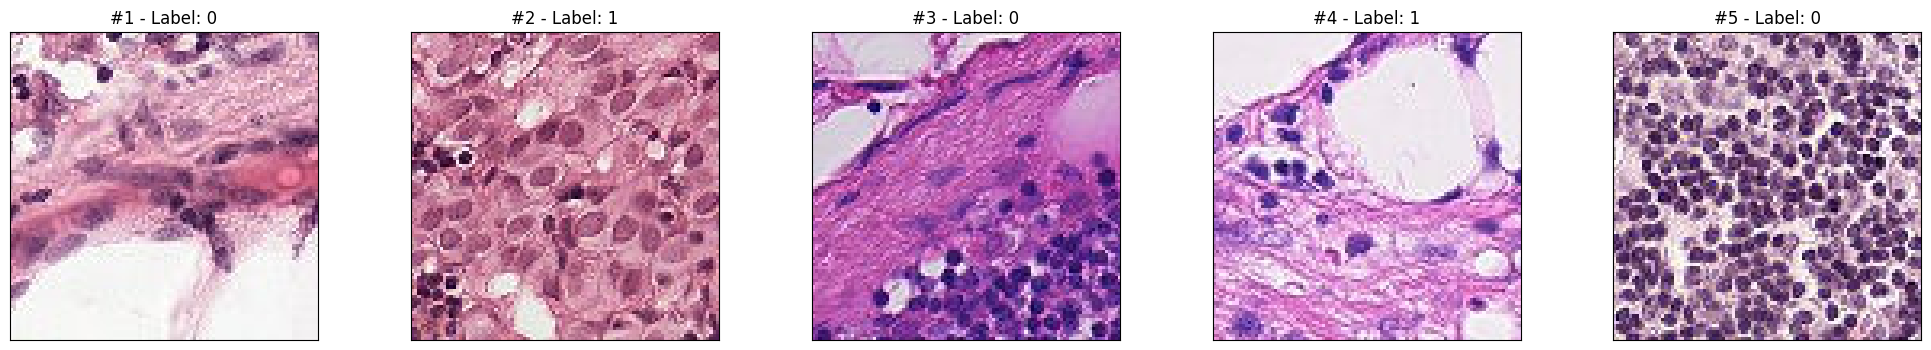

In [7]:
fig = plt.figure(figsize=(25, 4))
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    im = Image.open(train + img_train[i])
    plt.imshow(im)
    label = df_labels.loc[df_labels['id'] == img_train[i].split('.')[0], 'label'].values[0]
    ax.set_title(f'#{i+1} - Label: {label}')

<Axes: >

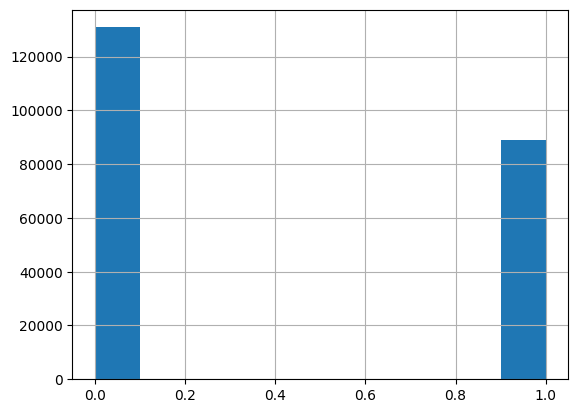

In [8]:
malignant = df_labels.loc[df_labels['label']==1]['id'].values
normal = df_labels.loc[df_labels['label']==0]['id'].values
df_labels['label'].hist()

In [9]:
train_data, val_data = train_test_split(df_labels, test_size=0.25, random_state=101, stratify=df_labels['label'])

In [10]:
train_data = train_data.astype(str)
val_data = val_data.astype(str)
print(train_data.shape,val_data.shape)

(165018, 2) (55007, 2)


In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_data['id'] += '.tif'
val_data['id'] += '.tif'

In [13]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory = train,
    x_col = 'id',
    y_col = 'label',
    target_size=(96,96),
    batch_size=32,
    class_mode='binary'
)

Found 165018 validated image filenames belonging to 2 classes.


In [14]:
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory = train,
    x_col='id',
    y_col='label',
    target_size=(96,96),
    batch_size=32,
    class_mode='binary'
)

Found 55007 validated image filenames belonging to 2 classes.


In [15]:
test_data = df_samples.astype(str)
test_data['id'] += '.tif'

In [16]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    directory = test,
    x_col='id',
    y_col='label',
    target_size=(96,96),
    batch_size=32,
)

Found 57458 validated image filenames belonging to 1 classes.


In [17]:
train_x = train_generator[0][0]
train_y = train_generator[0][1]

In [18]:
train_x.shape,train_y.shape

((32, 96, 96, 3), (32,))

In [19]:
#Defining the whole thing!!!
class QConv(tf.keras.layers.Layer):
  #initializaiton of the QCNN layer
  def __init__(self, filter_size, depth, activation = None, name = None, kernel_regularizer=None, **kwangs):
    #Standard notation thingy
    super(QConv, self).__init__(name=name, **kwangs)

    #Defining of the varaibles
    self.filter_size = filter_size
    self.depth = depth
    self.learning_params = []
    self.QCNN_layer_gen()
    self.activation = tf.keras.layers.Activation(activation)
    self.kernel_regularizer = kernel_regularizer
  
  #Initialize parameters for the quantum gates
  def _get_new_param(self):
    #Literally just generates a string "p0"... Instead of 0 it's just a number that
    new_param = sympy.symbols('p'+str(len(self.learning_params)))
    #Increase the size of the list (thus the numbers keep increasing (so there's no duplicates))
    self.learning_params.append(new_param)
    return new_param
  
  #This just defines 2 parameterized qubit gates and places them
  def _QConv(self, step, target, qubits):
    #First defining a Z and an X gate. First part = the rotation value (where we place our parameter), second part = where we place our gates
    yield cirq.CZPowGate(exponent=self._get_new_param())(qubits[target], qubits[target+step])
    yield cirq.CXPowGate(exponent=self._get_new_param())(qubits[target], qubits[target+step])
  
  def QCNN_layer_gen(self):
    #Pixels = the area which the filter will cover
    pixels = self.filter_size**2

    #So we're going to take our kernal and map it to qubits
    cirq_qubits = cirq.GridQubit.rect(self.filter_size, self.filter_size)

    #How you define the start of a quantum circuit
    input_circuit = cirq.Circuit()

    #There's another set of parameterized gates here. And we've got to define it's parameters
    input_params = [sympy.symbols('a%d' %i) for i in range(pixels)]

    #Now we apply those initial RX gates at the beginning for each qubit
    for i, qubit in enumerate(cirq_qubits):
      input_circuit.append(cirq.rx(np.pi*input_params[i])(qubit))
    
    #We're going to start antoher part, this time it's the kernal part
    QCNN_circuit = cirq.Circuit()

    #Basically something to help with the architechture of the kernal part (to help with the placement of the X and Z gates)
    step_size = [2**i for i in range(np.log2(pixels).astype(np.int32))]
    
    #This is the appending of said X and Z gates
    for step in step_size:
      for target in range(0, pixels, 2*step):
        QCNN_circuit.append(self._QConv(step,target,cirq_qubits))
    
    #now take the 2 parts of the quantum circuit to merge them all together
    full_circuit = cirq.Circuit()
    full_circuit.append(input_circuit)
    full_circuit.append(QCNN_circuit)

    #save it to use it later
    self.circuit = full_circuit

    #Save the parameters to use later
    self.params = input_params + self.learning_params

    #Save the operators (for the output) for later use
    self.op = cirq.Z(cirq_qubits[0])
  
  #Intializes everything... It creates the layer (with weights and stuff)
  def build(self, input_shape):
    #What's the input (image) width? Height? Number of channels?
    self.width = input_shape[1]
    self.height = input_shape[2]
    self.channel = input_shape[3]

    # The number of times which the kernal will pass on the image
    self.num_x = self.width - self.filter_size + 1
    self.num_y = self.height - self.filter_size + 1

    #Initializing the kernal! name, (how many (if there are 8, then it'll be a rectangular prism, but ostensibly 8 different kernals), channels, number of parameters each)
    #Then we initialzie the parameters, plus slap on a regularator if we wanted to
    self.kernel = self.add_weight(name = 'kernal',
                                 shape = [self.depth, self.channel, len(self.learning_params)],
                                 initializer = tf.keras.initializers.glorot_normal(),
                                 regularizer = self.kernel_regularizer)
    
    #We take our thing and convert it to a (quantum?) tensor
    self.circuit_tensor = tfq.convert_to_tensor([self.circuit] * self.num_x * self.num_y * self.channel)
  
  #Where the computation happens
  def call(self, inputs):
    #This is generating a giant stack of all the segements of the inputs which we're going to pass over the kernal
    #Also: It's just adding the slice to the whole stack each time. (It works like. Which cord on the map, then take a bit out of that with the size) 
    stack_set = None
    for i in range(self.num_x):
      for j in range(self.num_y):
        slice_part = tf.slice(inputs, [0, i, j, 0], [-1, self.filter_size, self.filter_size, -1])
        slice_part = tf.reshape(slice_part, shape=[-1, 1, self.filter_size, self.filter_size, self.channel])
        if stack_set == None:
          stack_set = slice_part
        else:
          stack_set = tf.concat([stack_set, slice_part], 1)
    #Then we just reformat it
    stack_set = tf.transpose(stack_set, perm=[0, 1, 4, 2, 3])
    stack_set = tf.reshape(stack_set, shape=[-1, self.filter_size**2])

    #Kind of reformats (except with some duplication) the (quantum?) tensor into a usable form
    circuit_inputs = tf.tile([self.circuit_tensor], [tf.shape(inputs)[0], 1])
    circuit_inputs = tf.reshape(circuit_inputs, shape=[-1])
    tf.fill([tf.shape(inputs)[0]*self.num_x*self.num_y, 1], 1)
    
    #Gonna take our inputs (now in the form of the stack) and pass them through our kernals
    outputs = []
    for i in range(self.depth):
      #Now we call the kernals we defined in build
      controller = tf.tile(self.kernel[i], [tf.shape(inputs)[0]*self.num_x*self.num_y, 1])
      #Actually passing into the QCNN layer
      outputs.append(self.single_depth_QCNN(stack_set, controller, circuit_inputs))
    #reformating
    output_tensor = tf.stack(outputs, axis=3)
    output_tensor = tf.math.acos(tf.clip_by_value(output_tensor, -1+1e-5, 1-1e-5)) / np.pi
    
    #Take our output, shove it through the activation, and then return it
    return self.activation(output_tensor)
  
  def single_depth_QCNN(self, input_data, controller, circuit_inputs):
    #Shove it on GPU
    with tf.device('/device:GPU:0'):
      #Reformat the input data
      input_data = tf.concat([input_data, controller],1)
      #Then taking our input and shoving it through the QCNN (along with it's paramters)
      QCNN_output = tfq.layers.Expectation()(circuit_inputs,
                                            symbol_names = self.params,
                                            symbol_values = input_data,
                                            operators = self.op)
      #Reformat x 2
      QCNN_output = tf.reshape(QCNN_output, shape=[-1, self.num_x, self.num_y, self.channel])
      return tf.math.reduce_sum(QCNN_output, 3)

In [20]:

#Defining the varaibles to intitalize the QCNN
width = 96
height = 96

In [ ]:
#Initializing the model
qcnn_model = models.Sequential()
#The QCNN!!!!!
qcnn_model.add(QConv(filter_size=2, depth=4, activation='relu', 
                     name='qconv1', input_shape=(width, height, 3)))
#So we can pase it to linear layers
qcnn_model.add(layers.Flatten())
qcnn_model.add(layers.Dense(32, activation='relu'))
#Important to have a softmax here... So all the probabilities add up to 100%
qcnn_model.add(layers.Dense(12, activation='softmax'))

In [ ]:
qcnn_model.summary()


In [ ]:
qcnn_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
qcnn_history = qcnn_model.fit(train_x, train_y,
                        epochs=1, batch_size=5)

In [ ]:
plt.plot(qcnn_history.history['loss'], label='loss')
plt.plot(qcnn_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss Per Epoch')

plt.subplot(1, 2, 2)
plt.plot(qcnn_history.history['auc'], label='Training AUC')
plt.plot(qcnn_history.history['val_auc'], label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

plt.show()